In [65]:
## import pkgs

import numpy as np 
import matplotlib.pyplot as plt
import astropy.constants as c
import astropy.units as u 
import natpy as nat
import smplotlib
import os 
import glob

In [64]:
## directories

# figure directory
fig_dir = 'figures'

### Import relevant constants

In [3]:
# assuming isotropic spherical distribution
mw_dm_mass = 1.5e12 # M_sun #Dehnen+2016
mw_dm_rad= 200 # pc # Dehnen+2016

mean_halo_dm_mass = 2.6e12 # mean halo DM mass from TNG 100-1
mean_dm_rad = 360 # kpc # mean halo DM radius from TNG 100-1

### Case 1: MW Only

Assume space is empty outside MW's DM halo and calculate the column density of WIMPs as a UHECR traverses the MW DM halo. 

$$ \Sigma = \int \rho_\mathrm{DM}(s) ds$$

where $\Sigma$ is the column density, $\rho_\mathrm{RM}$ is the density of dark matter and $s$ is the distance along the path traversed by the cosmic ray. For the simplest case, assume the UHECR travels in a straight line. This is analogus to the assumption that a UHECR is at really high energy and thus not strongly bent by magnetic fields or affected by other processes involving CR transport.

DM density in MW halo 3.03e-27 g / cm3
DM col density in MW halo assuming UHECR travels in a straight line to Earth 1.87e-03 g / cm2
DM col density in MW halo assuming UHECR travels in a straight line to Earth (c=1 units) 4.08e-07 GeV3


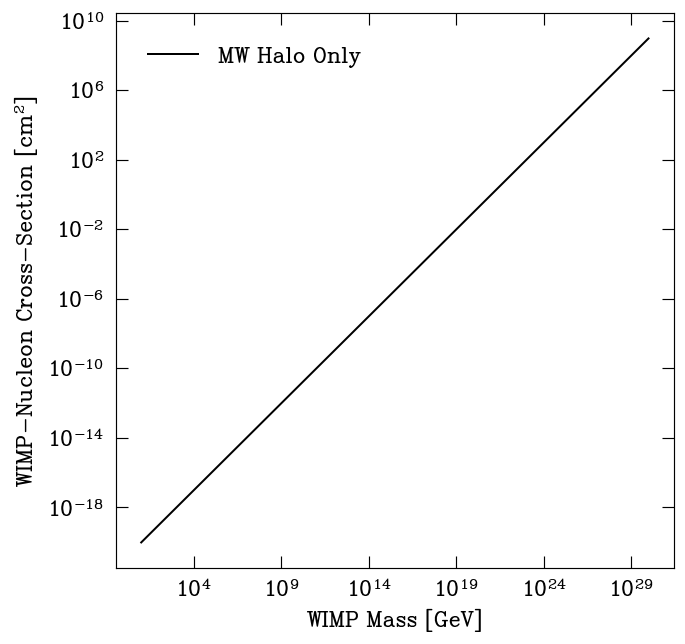

In [67]:
## calculate the density of MW DM halo
mw_dm_rho = mw_dm_mass*c.M_sun/(4/3*np.pi*(200*u.kpc)**3)
print(f"DM density in MW halo {mw_dm_rho.cgs:.2e}")

## calculate the column density assuming UHECR travels in straight line through MW halo
mw_dm_col_simple = mw_dm_rho*(mw_dm_rad)*u.kpc
print(f"DM col density in MW halo assuming UHECR travels in a straight line to Earth {mw_dm_col_simple.cgs:.2e}") # note this assumesEarth is at the centre of the galaxy, however, a difference of 8 kpc relatively negligible for this simple calc

# convert to c=1 units
mw_dm_col_simple_c1 = nat.convert(mw_dm_col_simple.cgs,u.GeV**3)
print(f"DM col density in MW halo assuming UHECR travels in a straight line to Earth (c=1 units) {mw_dm_col_simple_c1:.2e}") 

## generate some mass range of WIMP particles in GeV (c = 1 units)
wimp_mass_range = np.logspace(1, 30)*u.GeV

## calculate the cross-section
wimp_nuc_simple = nat.convert(wimp_mass_range/mw_dm_col_simple_c1, u.cm**2)

## plot the result
fig, ax = plt.subplots()

ax.plot(wimp_mass_range, wimp_nuc_simple, label = 'MW Halo Only')

# axes labels
ax.set_xlabel('WIMP Mass [GeV]')
ax.set_ylabel('WIMP-Nucleon Cross-Section [cm$^2$]')

# axes config
ax.set_xscale('log')
ax.set_yscale('log')

# legend
ax.legend(loc= 'best')

plt.savefig(os.path.join(fig_dir, 'MW_halo_only.pdf'))